<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#movie" data-toc-modified-id="movie-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>movie</code></a></span></li><li><span><a href="#english_level" data-toc-modified-id="english_level-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>english_level</code></a></span></li><li><span><a href="#subtitles" data-toc-modified-id="subtitles-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>subtitles</code></a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Bag-of-words-(BOW)" data-toc-modified-id="Bag-of-words-(BOW)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bag of words (BOW)</a></span></li><li><span><a href="#TF-IDF-(Term-Frequency---Inverse-Document-Frequency)" data-toc-modified-id="TF-IDF-(Term-Frequency---Inverse-Document-Frequency)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TF-IDF (Term Frequency - Inverse Document Frequency)</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li><li><span><a href="#Модель-градиентного-бустинга" data-toc-modified-id="Модель-градиентного-бустинга-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель градиентного бустинга</a></span></li><li><span><a href="#Результаты-моделей" data-toc-modified-id="Результаты-моделей-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Результаты моделей</a></span></li><li><span><a href="#Проверка-на-тестовых-данных" data-toc-modified-id="Проверка-на-тестовых-данных-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Проверка на тестовых данных</a></span></li></ul></li><li><span><a href="#Сохранение-модели-в-бинарном-виде" data-toc-modified-id="Сохранение-модели-в-бинарном-виде-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сохранение модели в бинарном виде</a></span></li><li><span><a href="#Вопросы-ревьюеру" data-toc-modified-id="Вопросы-ревьюеру-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вопросы ревьюеру</a></span></li></ul></div>

# English Movies Scores

## Подготовка данных

In [1]:
# Импорт библиотек
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from phik.phik import phik_matrix
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# !pip install pysrt -q
import pysrt
import re

# # Библиотеки для NLTK-лемматизации с соответствующими POS-тегами
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('omw-1.4')
# from nltk.corpus import stopwords
# nltk.download('stopwords')

# Библиотека для SpaCy-лемматизации
import spacy

# Векторайзеры
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Models, searchcv, pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from pickle import dump, load

2023-05-15 23:44:04.434897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Загрузим таблицу фильмов и меток.

In [2]:
movies_labels = pd.read_excel('English_level/English_scores/movies_labels.xlsx', 
                              usecols=['Movie', 'Level'])

Выведем таблицу фильмов и меток.

In [3]:
movies_labels

,Movie,Level
0,10_Cloverfield_lane(2016),B1
1,10_things_I_hate_about_you(1999),B1
2,A_knights_tale(2001),B2
3,A_star_is_born(2018),B2
4,Aladdin(1992),A2/A2+
...,...,...
236,Matilda(2022),C1
237,Bullet train,B1
238,Thor: love and thunder,B2
239,Lightyear,B2


Выведем основную информацию о датафрейме.

In [4]:
movies_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Movie   241 non-null    object
 1   Level   241 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


У нас есть 4 папки ('A2', 'B1', 'B2', 'C1'), в которых располагаются `.srt`-файлы. Каждый файл имеет название фильма, а в самом файле располагаются субтитры этого фильма.

Создадим датафрейм `df` с тремя столбцами:
- `movie` – название фильма из папок 'A2', 'B1', 'B2', 'C1';

- `subtitles` – текст субтитров фильма;
- `english_level` – присвоим каждому фильму уровень английского, соответствующий тому из какой папки был взят фильм.

In [5]:
# Создаем пустой датафрейм с нужными колонками
df = pd.DataFrame(columns=["movie", "subtitles", "english_level"])

# Список названий папок
folder_names = ['A2', 'B1', 'B2', 'C1']

# Указываем директорию с файлами .srt
directory = 'English_level/English_scores/Subtitles_all/'

# Проходим по всем папкам с фильмами
for folder_name in folder_names:
    # Получаем путь к папке
    folder_path = os.path.join(directory, folder_name)
    # Проходим по всем файлам в папке
    for file_name in os.listdir(folder_path):
        # Проверяем, что это .srt файл
        if file_name.endswith(".srt"):
            # Получаем полный путь к файлу
            file_path = os.path.join(folder_path, file_name)
            # Используем pysrt для загрузки субтитров из файла
            try:
                subs = pysrt.open(file_path)
            except UnicodeDecodeError:
                try:
                    subs = pysrt.open(file_path, encoding='iso-8859-1')
                except:
                    pass
            # Добавляем новую строку в датафрейм с информацией о фильме
            new_row = {
                "movie": file_name[:-4],  # удаляем расширение файла
                "subtitles": subs[1:].text, # удаляем первый рекламный субтитр и переводим pysrt-файл в текст
                "english_level": folder_name
            }
            df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

Выведем полученный датафрейм.

In [6]:
df

,movie,subtitles,english_level
0,The Walking Dead-S01E03-Tell It To The Frogs.E...,"Merle:\nThat's right. You heard me, bitch.\nYo...",A2
1,The Walking Dead-S01E05-Wildfire.English,I don't know if you're out there.\nI don't kno...,A2
2,The Walking Dead-S01E02-Guts.English,Boy: Mom!\nRight here.\n( pots rattling )\nAny...,A2
3,The Walking Dead-S01E04-Vatos.English,- What?\n- Nothing.\nIt's not nothing.\nIt's a...,A2
4,The Walking Dead-S01E06-TS-19.English,"Hey hey.\nWhoa whoa whoa whoa.\nMa'am. Ma'am, ...",A2
...,...,...,...
158,Suits.S03E08.480p.HDTV.x264-mSD,Darby backs me\nfor managing partner.\nI don't...,C1
159,Suits S04E06 EngSub,That's not\nWoodall coming after us.\nIt's Sea...,C1
160,Suits.S03E07.HDTV.x264-mSD,It's going up\non the wall tomorrow...\nAnd th...,C1
161,Suits S04E03 EngSub,You're good with me working\non the takeover w...,C1


Выведем основную информацию о датафрейме.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie          163 non-null    object
 1   subtitles      163 non-null    object
 2   english_level  163 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


У нас есть папка 'Subtitles', в которой по аналогии с папками выше располагаются `.srt`-файлы с субтитрами к фильмам, в соответствии с которыми эти файлы названы.

Создадим еще один датафрейм с тремя столбцами:
- `movie` – названия фильмов из папки 'Subtitles';
- `subtitles` – текст субтитров фильма;
- `english_level` – присвоим каждому фильму уровень английского, который указан в таблице `movies_labels`.

В случае отсутствия о фильме информации его уровня английского в таблице `movies_labels` или же если в папке 'Subtitles' не окажется фильма из таблицы, то такой фильм в датафрейм записываться не будет.

In [8]:
# Создание нового датафрейма
new_df = pd.DataFrame(columns=["movie", "subtitles", "english_level"])

# Название папки
folder_name = 'Subtitles'

# Путь к папке
folder_path = os.path.join(directory, folder_name)

# Цикл по всем строкам исходного датафрейма
for index, row in movies_labels.iterrows():
    # Получение названия файла .srt
    file_name = row["Movie"] + ".srt"
    # Получаем полный путь к файлу
    file_path = os.path.join(folder_path, file_name)
    # Проверка существования файла
    if os.path.exists(file_path):
        try:
            # Чтение субтитров из .srt-файла
            try:
                subs = pysrt.open(file_path)
            except UnicodeDecodeError:
                try:
                    subs = pysrt.open(file_path, encoding='iso-8859-1')
                except:
                    pass
            # Добавление строки в новый датафрейм
            new_row = {
                "movie": row["Movie"], 
                "subtitles": subs[1:].text, # удаляем первый рекламный субтитр и переводим pysrt-файл в текст
                "english_level": row["Level"]
            }
            new_df = pd.concat([new_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
        except:
            # В случае ошибки при чтении файла
            print(f"Ошибка при чтении файла {file_name}. Фильм будет пропущен.")
    else:
        # Если файла не существует
        print(f"Файл {file_name} не найден. Фильм будет пропущен.")

Файл The Secret Life of Pets.en.srt не найден. Фильм будет пропущен.
Файл Up (2009).srt не найден. Фильм будет пропущен.
Файл The Walking Dead-S01E01-Days Gone Bye.English.srt не найден. Фильм будет пропущен.
Файл The Walking Dead-S01E02-Guts.English.srt не найден. Фильм будет пропущен.
Файл The Walking Dead-S01E03-Tell It To The Frogs.English.srt не найден. Фильм будет пропущен.
Файл The Walking Dead-S01E04-Vatos.English.srt не найден. Фильм будет пропущен.
Файл The Walking Dead-S01E05-Wildfire.English.srt не найден. Фильм будет пропущен.
Файл The Walking Dead-S01E06-TS-19.English.srt не найден. Фильм будет пропущен.
Файл AmericanBeauty1999.BRRip.srt не найден. Фильм будет пропущен.
Файл Angelas.Christmas.Wish.2020.srt не найден. Фильм будет пропущен.
Файл Indiana Jones And The Last Crusade DVDRip Xvid -IZON-.srt не найден. Фильм будет пропущен.
Файл mechanic-resurrection_.srt не найден. Фильм будет пропущен.
Файл Men.In.Black.1997.720p.Bluray.x264-SEPTiC.srt не найден. Фильм будет пр

Выведем полученный датафрейм.

In [9]:
new_df

,movie,subtitles,english_level
0,10_Cloverfield_lane(2016),(CLANGING)\n(DRAWER CLOSES)\n(INAUDIBLE)\n(CEL...,B1
1,10_things_I_hate_about_you(1999),"I'll be right with you.\nSo, Cameron. Here you...",B1
2,A_knights_tale(2001),Should we help him?\nHe's due in the lists in ...,B2
3,A_star_is_born(2018),Get to it.\n<i>♪ Black eyes open wide\nIt's ti...,B2
4,Aladdin(1992),<i>Where the caravan camels roam</i>\n<i>Where...,A2/A2+
...,...,...,...
105,Venom(2018),"<i>The specimens are secured,\nand we're headi...",B2
106,Warm_bodies(2013),<i>I'm so pale.</i>\n<i>I should get out more....,B1
107,We_are_the_Millers(2013),<i>...it's full-on double rainbow all\nthe way...,B1
108,While_You_Were_Sleeping(1995),<i>I just don't remember it</i>\n<i>being this...,B1


Выведем основную информацию о датафрейме.

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie          110 non-null    object
 1   subtitles      110 non-null    object
 2   english_level  110 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


Объединим два полученных датафрейма в один.

In [11]:
df = pd.concat([df, new_df], ignore_index=True)

Выведем объединенный датафрейм.

In [12]:
df

,movie,subtitles,english_level
0,The Walking Dead-S01E03-Tell It To The Frogs.E...,"Merle:\nThat's right. You heard me, bitch.\nYo...",A2
1,The Walking Dead-S01E05-Wildfire.English,I don't know if you're out there.\nI don't kno...,A2
2,The Walking Dead-S01E02-Guts.English,Boy: Mom!\nRight here.\n( pots rattling )\nAny...,A2
3,The Walking Dead-S01E04-Vatos.English,- What?\n- Nothing.\nIt's not nothing.\nIt's a...,A2
4,The Walking Dead-S01E06-TS-19.English,"Hey hey.\nWhoa whoa whoa whoa.\nMa'am. Ma'am, ...",A2
...,...,...,...
268,Venom(2018),"<i>The specimens are secured,\nand we're headi...",B2
269,Warm_bodies(2013),<i>I'm so pale.</i>\n<i>I should get out more....,B1
270,We_are_the_Millers(2013),<i>...it's full-on double rainbow all\nthe way...,B1
271,While_You_Were_Sleeping(1995),<i>I just don't remember it</i>\n<i>being this...,B1


Выведем основную информацию об объединенном датафрейме.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie          273 non-null    object
 1   subtitles      273 non-null    object
 2   english_level  273 non-null    object
dtypes: object(3)
memory usage: 6.5+ KB


Отсортируем объединенный датафрейм по названиям фильмов.

In [14]:
df = df.sort_values(by='movie', ignore_index=True)

Выведем отсортированный объединенный датафрейм.

In [15]:
df

,movie,subtitles,english_level
0,10_Cloverfield_lane(2016),(CLANGING)\n(DRAWER CLOSES)\n(INAUDIBLE)\n(CEL...,B1
1,10_things_I_hate_about_you(1999),"I'll be right with you.\nSo, Cameron. Here you...",B1
2,A_knights_tale(2001),Should we help him?\nHe's due in the lists in ...,B2
3,A_star_is_born(2018),Get to it.\n<i>♪ Black eyes open wide\nIt's ti...,B2
4,Aladdin(1992),<i>Where the caravan camels roam</i>\n<i>Where...,A2/A2+
...,...,...,...
268,While_You_Were_Sleeping(1995),<i>I just don't remember it</i>\n<i>being this...,B1
269,Zootopia(2016),"Thousands of years ago,\nthese were the forces...",B2
270,icarus.2017.web.x264-strife,Solemnly swear the testimony\nyou're about to ...,B2
271,mechanic-resurrection_,"We saved your usual table, Mr. Santos.\nThank ...",B1


## Предобработка данных

### `movie`

Проверим датафрейм на наличие дубликатов по столбцу `movie`.

In [16]:
print('Количество дубликатов по столбцу "movie": {}'
      .format(df['movie'].duplicated().sum()))

Количество дубликатов по столбцу "movie": 4


Нашлось 4 дубликата. Удалим их.

In [17]:
df.drop_duplicates(subset='movie', inplace=True, ignore_index=True)

Проверим удалились ли дубликаты.

In [18]:
print('Количество дубликатов по столбцу "movie": {}'
      .format(df['movie'].duplicated().sum()))

Количество дубликатов по столбцу "movie": 0


Дубликатов не осталось.

### `english_level`

Проверим какие уникальные уровни английского языка есть в нашем итоговом датафрейме.

In [19]:
df['english_level'].sort_values().unique()

array(['A2', 'A2/A2+', 'A2/A2+, B1', 'B1', 'B1, B2', 'B2', 'C1'],
      dtype=object)

Видим, что есть уровни, которые содержут в себе 2 или 3 уровня одновременно. Заменим такие составные уровни на их верхнюю границу, т.е. возьмем из них их наивысший уровень. Но будет исключение для 'A2/A2+': этот составной уровень мы заменим на 'A2', т.к. если заменим на 'A2+', то фильмов с 'A2' будет слишком мало ($6$ штук или ${\sim}2.2\%$), что помешает нам при обучении и кросс-валидации модели.

In [20]:
# Проставим уровень по верхней границе
df['english_level'] = df['english_level'].replace({'A2/A2+': 'A2', 
                                                   'B1, B2': 'B2', 
                                                   'A2/A2+, B1': 'B1'})

Проверим какие уникальные уровни английского языка получились в датафрейме.

In [21]:
df['english_level'].sort_values().unique()

array(['A2', 'B1', 'B2', 'C1'], dtype=object)

### `subtitles`

Получившийся текст из субтитров необходимо обработать: убрать все лишние символы, указания кто говорит в диалогах и пр. Далее надо лемматизировать обработанный текст, т.е. привести каждое слово к его основной форме (лемме).

Для этих нужд напишем функции:
- `data_cleaning`– очистка данных;

- `nltk_lemmatization` – лемматизация с помощью библиотеки `nltk`;
- `spacy_lemmatization` – лемматизация с помощью библиотеки `spacy`.

In [27]:
# Регулярные выражения
HTML = re.compile('<[^>]*>')                    # html тэги меняем на пробел
COMMENTS = re.compile('[\(\[][A-Za-z ]+[\)\]]') # комменты в скобках меняем на пробел
UPPER = re.compile('[[A-Za-z ]+[\:\]]')         # указания на того кто говорит (BOBBY:)
LETTERS = re.compile('[^a-zA-Z\'.,!? ]')        # все что не буквы меняем на пробел 
DOTS = re.compile('[\.]+')                      # многоточие меняем на точку
SPACES = re.compile('\s{2,}')                   # два или более пробельных символа подряд
SYMB = re.compile("[^\w\d'\s]")                 # знаки препинания кроме апострофа

# Очистка данных
def data_cleaning(text):
    text = HTML.sub(' ', text)                     # html тэги меняем на пробел
    text = UPPER.sub(' ', text)                    # указания на того кто говорит (BOBBY:)
    text = COMMENTS.sub(' ', text)                 # комменты в скобках меняем на пробел
    text = LETTERS.sub(' ', text)                  # все что не буквы меняем на пробел
    text = DOTS.sub(r'.', text)                    # многоточие меняем на точку
    text = SYMB.sub('', text)                      # знаки препинания кроме апострофа на пустую строку
    text = SPACES.sub(' ', text)                   # повторяющиеся пробелы меняем на один пробел
    text = re.sub('www', '', text)                 # кое-где остаётся www, то же меняем на пустую строку
    text = text.lstrip()                           # обрезка пробелов слева
    text = text.encode('ascii', 'ignore').decode() # удаляем все что не ascii символы   
    text = text.lower()                            # текст в нижний регистр
    return text

# # NLTK-лемматизация с соответствующими POS-тегами
# def nltk_lemmatization(text):
#     # Создание карты POS-тегов
#     def get_wordnet_pos(word):
#         # Map POS tag to first character lemmatize() accepts
#         tag = nltk.pos_tag([word])[0][1][0].upper()
#         tag_dict = {"J": wordnet.ADJ,
#                     "N": wordnet.NOUN,
#                     "V": wordnet.VERB,
#                     "R": wordnet.ADV}
#         return tag_dict.get(tag, wordnet.NOUN)

#     # Удаление стоп-слов и упрощенная токенизация с помощью .split()
#     stop_words = stopwords.words('english')
#     text = [word for word in text.split() if word not in stop_words]
#     # Инициализируем Wordnet Lemmatizer
#     lemmatizer = WordNetLemmatizer()
#     # Лемматизация списка слов и их объединение
#     text = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text])
#     return text

# SpaCy-лемматизация
def spacy_lemmatization(text):
    # Инициализируем spacy 'en_core_web_sm' модель
    nlp = spacy.load('en_core_web_sm')
    # Лемматизация
    text = ' '.join([token.lemma_ for token in nlp(text)])
    return text

/var/folders/jj/yjtmqbj908n07r5gws8ll6mm0000gp/T/ipykernel_51389/2522802675.py:4: FutureWarning: Possible nested set at position 1
  UPPER = re.compile('[[A-Za-z ]+[\:\]]')         # указания на того кто говорит (BOBBY:)


В функции `nltk_lemmatization` вместо `nltk.word_tokenize` я использовал `.split()`, т.к. при токенизации такие слова как 'don't' превращались в два отдельных слова: 'do' и 'n't'. А в `stopwords.words('english')` слово 'don't' и другие как раз имеются.

Но в итоге будем использовать `spacy`-лемматизацию, т.к. она дает большее качество у моделей.

Применим функцию `data_cleaning` к субтитрам.

In [28]:
df['subtitles'] = df['subtitles'].apply(lambda x: data_cleaning(x))

Применим функцию `spacy_lemmatization` к субтитрам.

In [29]:
df['subtitles'] = df['subtitles'].apply(lambda x: spacy_lemmatization(x))

### Разбиение данных на выборки

Извлечем целевой признак в переменную `target`, а субтитры — в `features`.

In [30]:
features = df['subtitles']
target = df['english_level']

Разобьем данные на обучающую и тестовую выборки.

In [31]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Проверим, в правильном ли соотношении разбились обучающая и тестовая выборки.

In [32]:
print('Обучающая и тестовая выборки разделены в отношении:', 
      int(round(len(features_train) / len(features) * 100, 0)), ':', 
      int(round(len(features_test) / len(features) * 100, 0)))

Обучающая и тестовая выборки разделены в отношении: 80 : 20


## Обучение моделей

Создадим датафрейм, в который будут записываться результаты подбора моделей.

In [33]:
results = pd.DataFrame({'Модель': [], 'Параметры': [], 'Accuracy': []})

### Исследование задачи

Исследуем баланс классов, т.е. проверим, как часто в целевом признаке встречаются, определенные нами, классы «A2», «B1», «B2» и «C1».

B2    0.531599
B1    0.208178
C1    0.144981
A2    0.115242
Name: english_level, dtype: float64


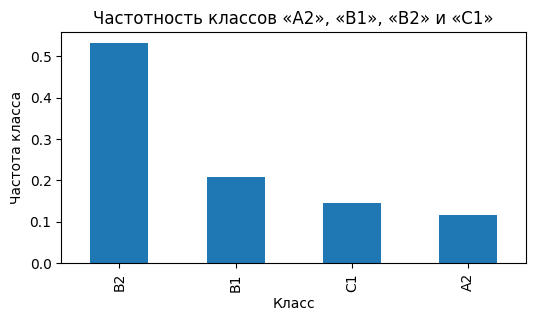

In [44]:
class_frequency = df['english_level'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', figsize=(6, 3))
plt.xlabel('Класс')
plt.ylabel('Частота класса')
plt.title('Частотность классов «A2», «B1», «B2» и «C1»')
plt.show()

Как видно из графика, наблюдается дисбаланс классов. Это связано с малым количеством данных. С этим можно бороться (например, с помощью resampling или расширением датасета), но в рамках данного проекта мы пока не будем этим заниматься.

### Bag of words (BOW)

Введем `CountVectorizer`, с помощью которого произведем векторизацию текста субтитров.

In [35]:
# count_vec = CountVectorizer()

При использовании `Bag of words` метрики моделей оказались ниже, чем при использовании `TF-ID`. Поэтому будем использовать `TF-ID`.

### TF-IDF (Term Frequency - Inverse Document Frequency)

Введем `TfidfVectorizer`, с помощью которого произведем векторизацию текста субтитров.

In [36]:
tfidf_vec = TfidfVectorizer(min_df=5, max_df=0.7, max_features=1500)

Добавление параметра `ngram_range=(1, 3)` только ухудшило метрику качества модели. А добавление комбинации из параметров `min_df=5, max_df=0.7, max_features=1500` улучшило качество.

### Модель случайного леса

Был произведен поиск по следующей сетке гиперпараметров:
- `criterion = ['gini', 'entropy']`
- `max_depth = range(1, 11)`
- `n_estimators = range(10, 101, 10)`

Лучший результат показали следующие гиперпараметры:

Для `TfidfVectorizer`:
- `criterion = 'gini'`
- `max_depth = 9`
- `n_estimators = 10`

In [37]:
random_forest = RandomForestClassifier(random_state=12345, n_jobs=-1)
random_forest_pipeline = make_pipeline(tfidf_vec, random_forest)
random_forest_params = {'criterion': ['gini'],
                        'max_depth': [9],
                        'n_estimators': [10]
                       }
random_forest_new_params = {random_forest_pipeline.steps[1][0] + '__' + key: random_forest_params[key] 
                            for key in random_forest_params}
random_forest_grid = GridSearchCV(random_forest_pipeline, random_forest_new_params, 
                                  cv=3, n_jobs=-1, scoring='accuracy')
random_forest_grid.fit(features_train, target_train)

results.loc[len(results)] = [random_forest_grid.best_estimator_.steps[1][0],
                             random_forest_grid.best_estimator_,
                             random_forest_grid.best_score_]

print('Результаты наилучшей модели случайного леса на обучающих данных: \n')
print(f'Параметры: {random_forest_grid.best_params_} \n')
print(f'Accuracy: {random_forest_grid.best_score_} \n')

Результаты наилучшей модели случайного леса на обучающих данных: 

Параметры: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__n_estimators': 10} 

Accuracy: 0.6094809598330725 



/Users/GermanBaev/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


### Модель логистической регрессии

Был произведен поиск по следующей сетке гиперпараметров:
- `C = np.logspace(0, 4, 5)`
- `penalty = ['l1', 'l2', 'elasticnet', None]`
- `solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']`

Лучший результат показали следующие гиперпараметры:

Для `TfidfVectorizer`:
- `C = 1` 
- `penalty = None`
- `solver = 'lbfgs'`

In [38]:
log_reg = LogisticRegression(random_state=12345, max_iter=1000)
log_reg_pipeline = make_pipeline(tfidf_vec, log_reg)
log_reg_params = {'C': [1], 
                  'penalty': [None],
                  'solver': ['lbfgs']
                 }
log_reg_new_params = {log_reg_pipeline.steps[1][0] + '__' + key: log_reg_params[key] 
                      for key in log_reg_params}
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_new_params, cv=3, 
                            n_jobs=-1, scoring='accuracy')
log_reg_grid.fit(features_train, target_train)

results.loc[len(results)] = [log_reg_grid.best_estimator_.steps[1][0], 
                            log_reg_grid.best_estimator_,
                             log_reg_grid.best_score_]

print('Результаты наилучшей модели логистической регрессии на обучающих данных: \n')
print(f'Параметры: {log_reg_grid.best_params_} \n')
print(f'Accuracy: {log_reg_grid.best_score_} \n')

Результаты наилучшей модели логистической регрессии на обучающих данных: 

Параметры: {'logisticregression__C': 1, 'logisticregression__penalty': None, 'logisticregression__solver': 'lbfgs'} 

Accuracy: 0.6652321335419926 



### Модель градиентного бустинга

Модель `CatBoost` оказалась очень долгой в обучении и ее качество хуже, чем у логистической регрессии.

### Результаты моделей

Выведем результаты моделей.

In [39]:
results.sort_values('Accuracy', ascending=False)

,Модель,Параметры,Accuracy
1,logisticregression,"(TfidfVectorizer(max_df=0.7, max_features=1500...",0.665232
0,randomforestclassifier,"(TfidfVectorizer(max_df=0.7, max_features=1500...",0.609481


### Проверка на тестовых данных

Запишем лучшую модель в переменную, а также ее предсказания на тестовых данных.

In [40]:
# Получение лучшей модели
best_model = log_reg_grid.best_estimator_

# Использование лучшей модели для прогнозирования на тестовых данных
predicted = best_model.predict(features_test)

Построим матрицу неточностей.

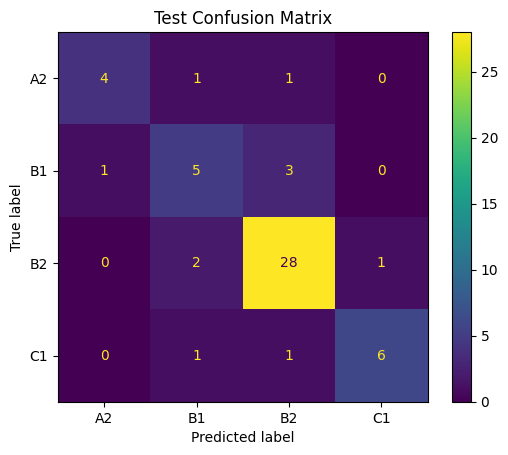

In [62]:
cm = confusion_matrix(target_test, predicted, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Test Confusion Matrix')
plt.show()

Cравнение предсказанных значений с тестовыми истинными значениями целевой переменной.

In [42]:
accuracy = accuracy_score(target_test, predicted)
print("Test Accuracy:", accuracy)

predicted

Test Accuracy: 0.7962962962962963


array(['B2', 'C1', 'B2', 'B1', 'B2', 'C1', 'B2', 'B2', 'B2', 'B2', 'B1',
       'C1', 'B2', 'B2', 'B2', 'B2', 'B2', 'B2', 'C1', 'B2', 'B2', 'B2',
       'A2', 'A2', 'B2', 'B2', 'B2', 'B1', 'C1', 'B2', 'B2', 'B2', 'C1',
       'B2', 'B1', 'B2', 'B2', 'B1', 'B2', 'A2', 'A2', 'B2', 'A2', 'B1',
       'B2', 'C1', 'B2', 'B2', 'B1', 'B1', 'B2', 'B2', 'B2', 'B1'],
      dtype=object)

## Сохранение модели в бинарном виде

In [43]:
with open('model.pcl', 'wb') as fid:
    dump(best_model, fid)

## Вопросы ревьюеру

Проект очень сырой, особенно Streamlit приложение. Так что сразу прошу прощения. Вопросов очень много, т.к. тема NLP очень большая, а самостоятельное изучение такой сложной темы дело малоэффективное.

- Правильную ли метрику качества модели я выбрал (Accuracy)?
- Как можно улучшить модель? С помощью чего? Возможно с помощью Word2Vec или чего-то еще? Или может какие-то параметры указать в векторайзерах? Или может даже с помощью GridSearchCV подобрать в векторайзеры наилучшие параметры?
- Стоит ли еще для улучшения модели пытаться сделать upsampling данных, чтобы убрать дисбаланс классов? Или поможет только расширение датасета путем добавления новых фильмов и их уровня английского?
- Может ли помочь в улучшении качества модели введение новых фич? Какие фичи обычно добавляют в задачах NLP?
- В приложении Streamlit на любой файл с субтитрами модель предсказывает почему-то уровень "B2".
- Не смог в Streamlit для поступающих от пользователя субтитров убрать первую рекламную строку. Там сразу субтитры в текст переводятся вроде. Как быть?
- Почему-то в приложении некоторые субтитры очень долго обрабатываются. Видимо на это влияет лемматизация посредством spacy, т.к. в юпитер ноутбуке лемматизация 269 фильмов занимает 7 минут. Как с этим бороться? Поменять лемматизацию с помощью spacy на какую-то другую библиотеку?
- Как встроить очистку данных (функция `data_cleaning`) и лемматизацию (функция `spacy_lemmatization`) в пайплайн? Можно ли и нужно ли это делать? Идея в том, чтобы вся обработка текста была в модели, а в файле app.py не прописывать эти функции обработки, просто подать в модель необработанный текст, он в модели обработается и выдаст результат.
- Хотел добавить в Streamlit приложение парсинг субтитров с сайта www.opensubtitles.org, но не осилил. Может есть где-то код-примеры реализации или хотя бы статьи где об этом можно почитать?